#### Testing out how both techniques are used in financial markets
Follow along to this blog: [https://pythonforfinance.net/2019/05/30/python-monte-carlo-vs-bootstrapping/]

In [2]:
import pandas as pd
import numpy as np
from functools import reduce
import pandas_datareader.data as web
import datetime
import random
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')
figsize=(15,8)

In [3]:
start,end = datetime.datetime(2009,12,30),datetime.datetime(2019,5,29)
tickers = ["^DJI","^IXIC","^GSPC","^STOXX50E","^N225","^GDAXI"]

asset_universe = pd.DataFrame([web.DataReader(ticker,'yahoo',start,end).loc[:,'Adj Close'] for ticker in tickers],
                             index = tickers).T.fillna(method='ffill')
asset_universe = asset_universe/asset_universe.iloc[0,:]

<AxesSubplot:xlabel='Date'>

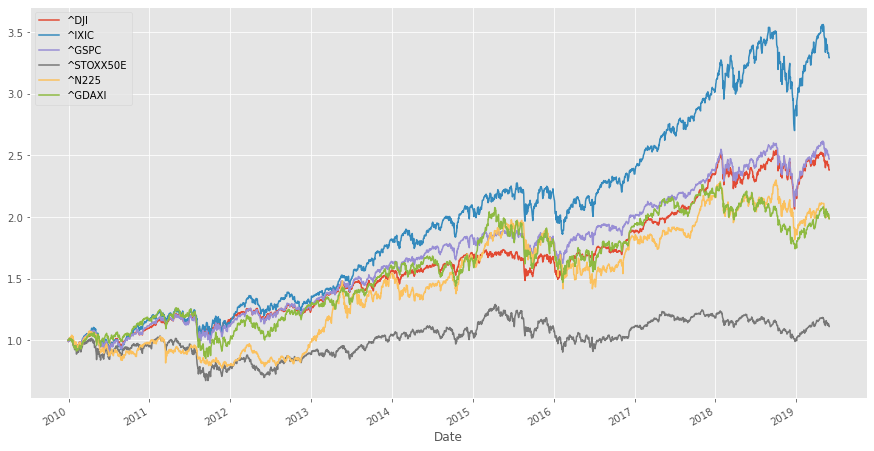

In [4]:
asset_universe.plot(figsize=figsize)

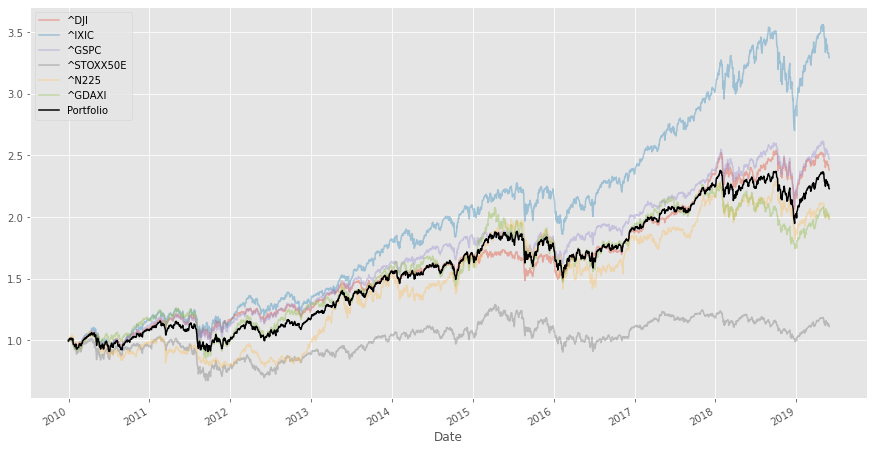

In [7]:
portfolio_returns = asset_universe.pct_change().dropna().mean(axis=1)
portfolio = (asset_universe.pct_change().dropna().mean(axis=1)+1).cumprod()

asset_universe.plot(figsize=figsize,alpha=0.4)
portfolio.plot(label='Portfolio',color='black')
plt.legend()
plt.show()

In [9]:
portfolio_bootstrapping = (1+pd.DataFrame([random.choices(list(
portfolio_returns.values),k = 252) for i in range(1000)]).T.shift(1).fillna(0).cumprod())


<AxesSubplot:>

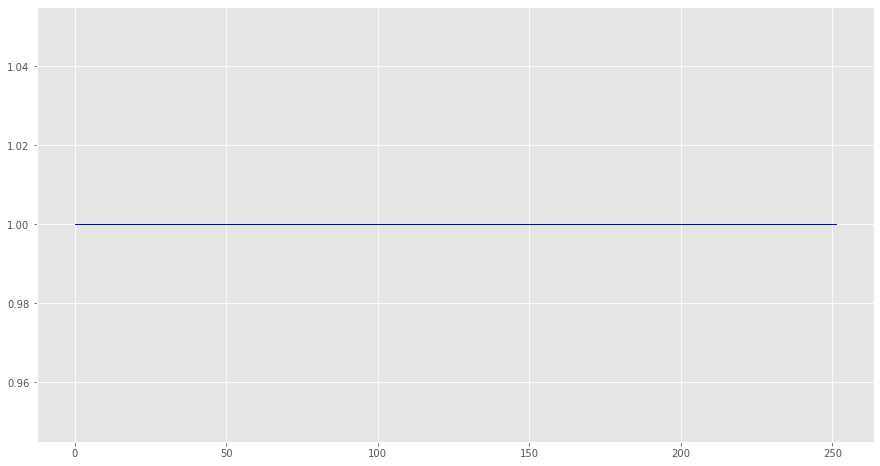

In [11]:
portfolio_bootstrapping.plot(figsize=figsize,legend=False,linewidth=1,alpha=0.2,
                            color='b')

<AxesSubplot:>

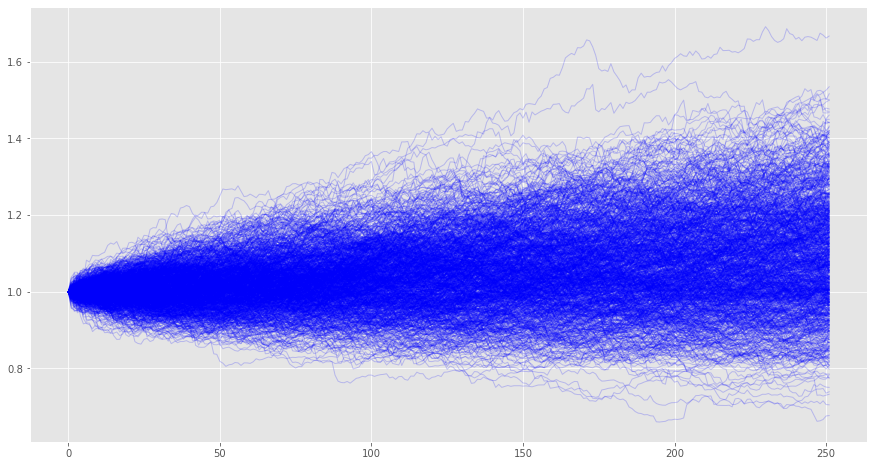

In [12]:
portfolio_bootstrapping = (1+pd.DataFrame([random.choices(list(
    portfolio_returns.values), k=252) for i in 
    range(1000)]).T.shift(1).fillna(0)).cumprod()

portfolio_bootstrapping.plot(figsize=figsize, legend=False, linewidth=1, alpha=0.2, color='b')

<AxesSubplot:>

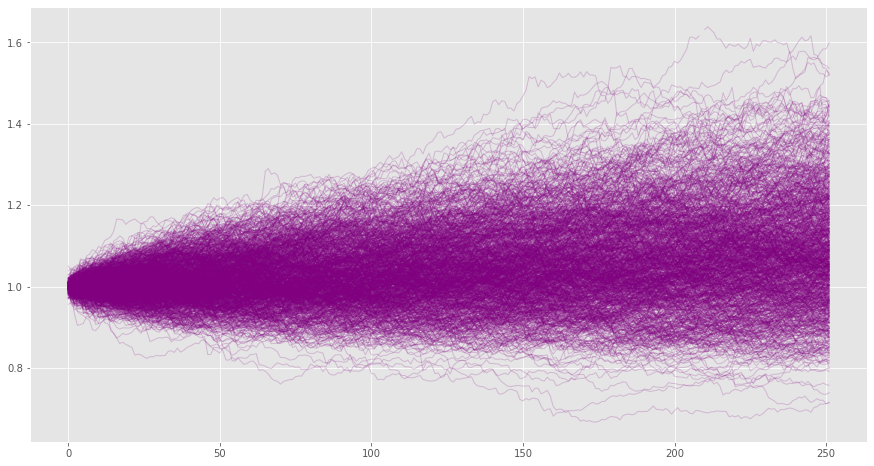

In [14]:
asset_universe_returns = asset_universe.pct_change()
portfolio_constituents_bootstrapping =pd.DataFrame([((asset_universe_returns.iloc[random.choices(range(len(asset_universe)),
                                                          k=252)]).mean(axis = 1)+1).cumprod().values
             for x in range(1000)]).T
portfolio_constituents_bootstrapping.plot(figsize=figsize,legend=False,
                                         linewidth=1, alpha=0.2,color='purple')